<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">


Baseado no Código disponibilizado no Livro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas.

# k-Means

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Gerando dados fictícios

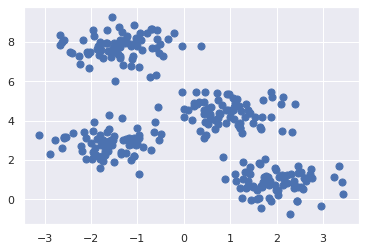

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Executando o k-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

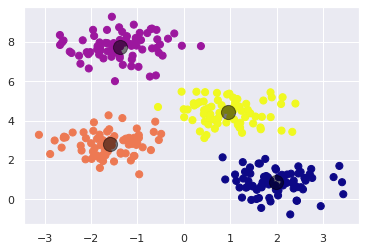

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Algumas considerações sobre o K-means

#### Expectation–Maximization
Expectation–maximization (E–M) é um algoritmo poderoso que é aplicado em várias situações em Data Science.

k-means é um exemplo particular e fácil de entender do algoritmo.

Procedimento:

1. Definir uma suposição inicial ("Chutar" os centróides dos grupos/clusters);
2. Repetir até convergir:
   1. *E-Step*: associar pontos ao centróide mais próximo;
   2. *M-Step*: Ajustar os centróides com base na média dos pontos associados.

Cada repetição do passo E e do passo M sempre **resultará em uma melhor estimativa** das características do cluster.



#### O ótimo global pode não ser encontrado
Embora o procedimento E–M tenha a garantia de melhorar o resultado em cada etapa, não há garantia de que ele levará à melhor solução *global*.

Por esta razão, é comum que o algoritmo seja executado para várias suposições iniciais. Por exemplo, o Scikit-Learn faz isso por padrão (definido pelo parâmetro ``n_init``, cujo padrão é 10).

#### O número de clusters deve ser selecionado com antecedência
O *k*-means **não aprende o número de clusters** a partir dos dados. Isso deve ser passado como parâmetro ao algoritmo, o que pode se tornar um **desafio**.

Se pedirmos ao algoritmo para identificar 6 clusters, ele prosseguirá e encontrará os 6 melhores clusters, independentemente se esta quantidade faz ou não sentido para o dataset sendo analisado:

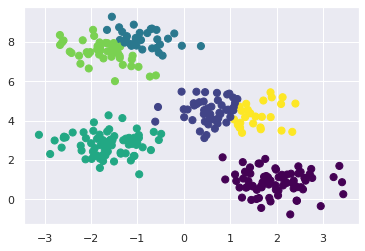

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Se o resultado é significativo é uma questão difícil de responder de forma definitiva; há algumas abordagens para realizar esta análise, mas que não discutiremos agora (e.g., Método do Cotovelo, da Silhueta ou da Estatística Gap).


Alternativamente, você pode usar um algoritmo de agrupamento mais complexo, que tenha uma medida quantitativa melhor da definição do ajuste por número de agrupamentos (e.g., Gaussian Mixture Models) ou que consegue definir o número de clusters (e.g., DBSCAN, mean-shift, ou affinity propagation, todos disponíveis no módulo ``sklearn.cluster`` do sci-kit learn). Veremos isso mais adiante!

#### k-means é limitado a limites de cluster lineares:

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

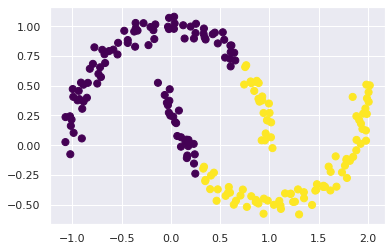

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Alguns algoritmos realizam um truque que consiste em uma transformação para projetar os dados em uma dimensão superior onde uma separação linear é possível.

Uma versão do *k*-means com esta habilidade é implementado no Scikit-Learn dentro do estimador ``SpectralClustering``.
Ele usa o gráfico dos vizinhos mais próximos para calcular uma representação de dimensão superior dos dados e, em seguida, atribui rótulos usando um algoritmo *k*-means:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


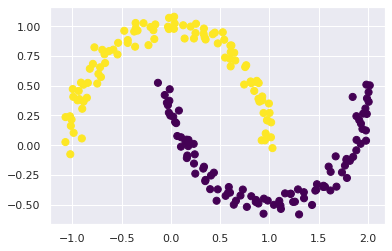

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### k-means pode ser lento para um grande número de amostras
O requisito de usar todos os dados em cada iteração pode ser **relaxado**: por exemplo, você pode usar apenas um subconjunto dos dados para atualizar os centros de cluster em cada etapa.
Esta é a idéia por trás dos algoritmos *k*-means baseados em lote, como a abordagem implementada em ``sklearn.cluster.MiniBatchKMeans``.

# Exemplo: k-means com dígitos manuscritos

Aqui usaremos o *k*-means para tentar identificar dígitos semelhantes *sem usar as informações do rótulo original*.

#### Carregando o Dataset
O conjunto de dados de dígitos consiste em 1.797 amostras com 64 features, onde cada uma das 64 features é o brilho de um pixel em uma imagem 8×8:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

#### Clusterização:

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

O resultado são 10 clusters em 64 dimensões.
Observe que os próprios centros do cluster são pontos de 64 dimensões e podem ser interpretados como um dígito "típico" dentro do cluster.
Vamos ver como são esses centros de cluster:

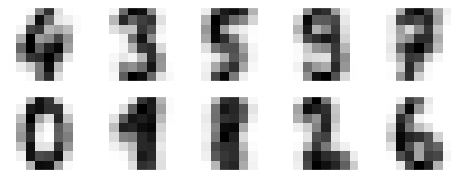

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vamos verificar como ficou a intersecção dos clusters gerados com os labels reais para verificar a acurácia dos nossos clusters:

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

#### Conseguimos uma acurácia de quase 80% com este simples K-means:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

#### Matriz de confusão

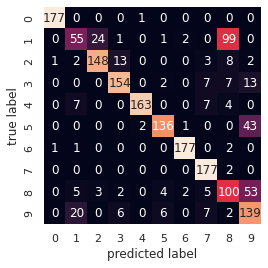

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labels, digits.target)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('predicted label')
plt.ylabel('true label');

#### Outra abordagem com t-SNE
Apenas por diversão, vamos tentar levar isso ainda mais longe.
Podemos usar o algoritmo **t-distributed Stochastic Neighbor Embedding (t-SNE)** para pré-processar os dados antes de executar *k*-means .

Não se preocupe em entender como isto funciona neste momento.

In [ ]:
from sklearn.manifold import TSNE

# este passo demora alguns segundos
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

print(digits_proj.shape)

# Computa os clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permuta as labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Computa a acurácia
accuracy_score(digits.target, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1797, 2)


0.9432387312186978